In [ ]:
**Data Analysis project- AIRBNB LA
1. Identify libraries
2. Import dataset
3. Initial exploration
4. Data Cleaning
5. Data Analysis **

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#LOAD DATASET


In [5]:
df = pd.read_csv('/Users/hritik/Downloads/listings LA.csv', encoding='utf-8',encoding_errors='ignore')

/var/folders/2f/ly0mx7ws4fz9h6krdgk5fywh0000gn/T/ipykernel_3485/2313926951.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/hritik/Downloads/listings LA.csv', encoding='utf-8',encoding_errors='ignore')


In [8]:
df.shape

(45533, 25)

In [9]:
print(df.iloc[:,4].head(5))

0    20/01/13
1    22/07/19
2    08/05/23
3    22/11/21
4    29/07/23
Name: host_since, dtype: object


In [7]:
df['host_since'] = pd.to_datetime(df['host_since'],  format='%Y-%m-%d', errors='coerce')


In [10]:
print(df.iloc[:,4].dtype)

object


In [9]:
 df.isnull().sum()

id                                  0
name                                1
host_id                             0
host_name                           2
host_since                      45533
host_response_time              10088
host_response_rate              10088
host_is_superhost                1252
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        8239
bedrooms                         3039
beds                             8334
price                            8237
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            12146
license                         32730
instant_bookable                    0
dtype: int64

In [11]:
df = df[df['price'].notnull()]

In [12]:
df.dtypes
df['id']= df['id'].astype(object)
df['host_id']= df['host_id'].astype(object)

In [13]:
df['price']

0        399.0
2        434.0
3         49.0
4        231.0
5         62.0
         ...  
45521    116.0
45522    105.0
45523    150.0
45531    116.0
45532    338.0
Name: price, Length: 37296, dtype: float64

<Axes: xlabel='price'>

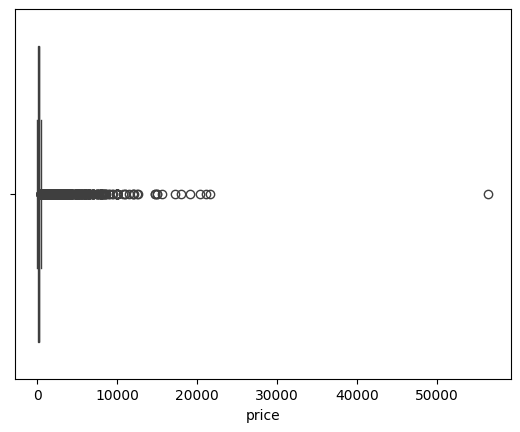

In [14]:
sns.boxplot(data=df, x='price')

In [15]:
data = df[df['price'] < 15000]

<Axes: xlabel='price'>

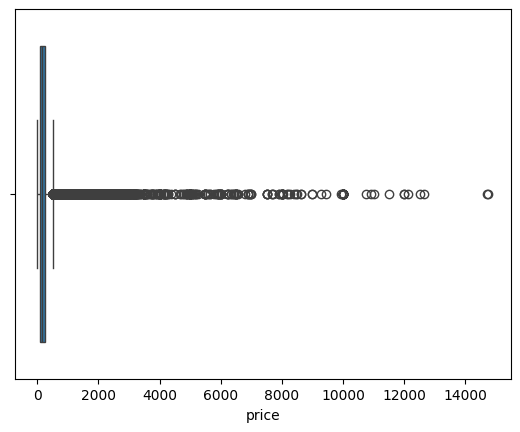

In [16]:
sns.boxplot(data=data, x='price')

<Axes: xlabel='price', ylabel='Count'>

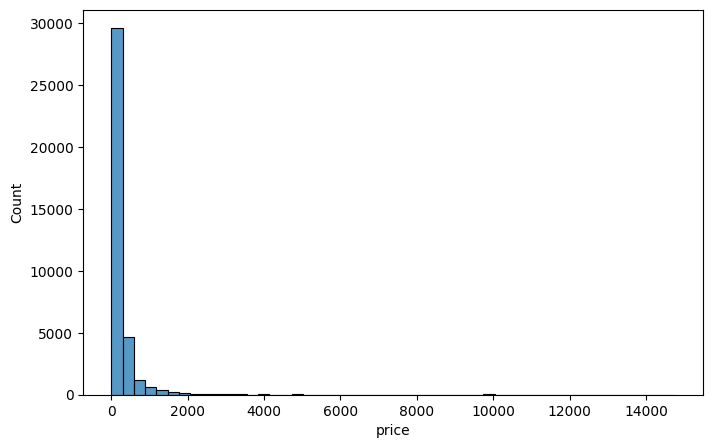

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='price', bins=50)


Text(0.5, 1.0, 'Price Distribution')

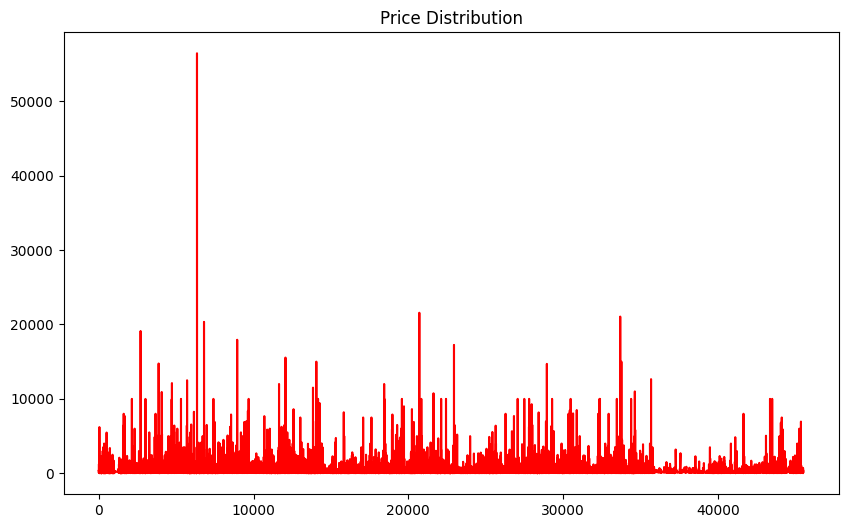

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Price', color='red')
plt.title('Price Distribution')

In [19]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'license',
       'instant_bookable'],
      dtype='object')

<Axes: xlabel='availability_365', ylabel='Count'>

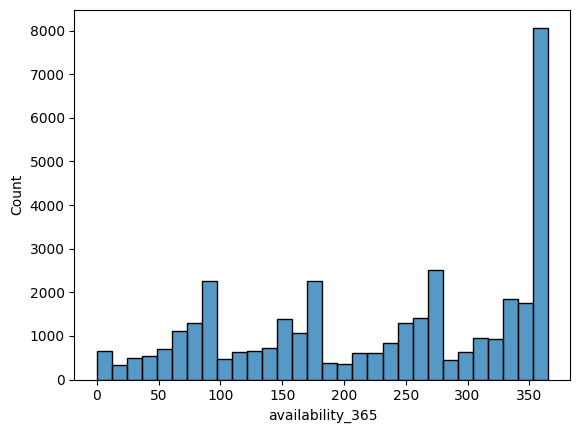

In [20]:
sns.histplot(data=df, x='availability_365')

In [21]:
#BIvariate availability

In [28]:
df.groupby(by='neighbourhood_group_cleansed')['price per bed'].mean()

neighbourhood_group_cleansed
City of Los Angeles     inf
Other Cities            inf
Unincorporated Areas    inf
Name: price per bed, dtype: float64

In [23]:
df.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bathrooms,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,0.96,f,West Los Angeles,City of Los Angeles,...,3.0,3.0,3.0,399.0,30,365,0,NaN,NaN,f
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,0.60,f,Beverly Hills,Other Cities,...,3.0,3.0,3.0,434.0,30,267,0,NaN,NaN,f
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,0.20,f,Temple City,Other Cities,...,1.0,1.0,1.0,49.0,1,364,1,3.00,NaN,f
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,1.00,t,Santa Monica,Other Cities,...,1.0,0.0,1.0,231.0,5,193,44,4.93,Exempt,t
5,1082614257267236225,Practical Private Room #1398 A,557999481,Christos,22/01/24,within a day,1.00,f,North Hollywood,City of Los Angeles,...,0.0,4.0,1.0,62.0,30,278,0,NaN,NaN,f


In [57]:
#FEATURE ENGINEERIN

In [15]:
df['price per bed']= df['price']/df['beds']

In [16]:
df.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,...,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,license,instant_bookable,price per bed
0,670339032744709144,Westwood lovely three bedrooms three bathrooms,4780152,Moon,20/01/13,within a few hours,0.96,f,West Los Angeles,City of Los Angeles,...,3.0,3.0,399.0,30,365,0,NaN,NaN,f,133.000000
1,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,22/07/19,NaN,NaN,f,Beverlywood,City of Los Angeles,...,2.0,NaN,NaN,30,0,0,NaN,NaN,f,NaN
2,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,08/05/23,within a day,0.60,f,Beverly Hills,Other Cities,...,3.0,3.0,434.0,30,267,0,NaN,NaN,f,144.666667
3,850744632375448560,Tianpu's warm room with bathroom,432956623,Dan,22/11/21,a few days or more,0.20,f,Temple City,Other Cities,...,1.0,1.0,49.0,1,364,1,3.00,NaN,f,49.000000
4,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,29/07/23,within an hour,1.00,t,Santa Monica,Other Cities,...,0.0,1.0,231.0,5,193,44,4.93,Exempt,t,231.000000


In [17]:
print(df['price per bed'].describe())


count    3.718900e+04
mean              inf
std               NaN
min      7.333333e-01
25%      5.900000e+01
50%      8.950000e+01
75%      1.410000e+02
max               inf
Name: price per bed, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [18]:
df['price per bed'].head

<bound method NDFrame.head of 0        133.000000
1               NaN
2        144.666667
3         49.000000
4        231.000000
            ...    
45528           NaN
45529           NaN
45530           NaN
45531    116.000000
45532     84.500000
Name: price per bed, Length: 45533, dtype: float64>

In [21]:
inf_rows = df[df['price per bed'].isin([np.inf, -np.inf])]
print(inf_rows)


                        id                                               name  \
132    1136654034247845953                                  Hollywwod Gataway   
195     745910682417118053                                         布帘隔离的单人床 1   
226    1146494346397216545                    Modern Guesthouse - Heart of LA   
257               53934023                    Studio on rose ave by the beach   
259    1161612245957825125          Deluxe Townhome w/ Hollywood Sunset Views   
...                    ...                                                ...   
44908  1154021798021333888  *Hollywood Dreams* Memory Foam Beds + Free Par...   
45172  1150888394125614739                    KTown Urban Oasis Room near USC   
45265               534552                    Amazing VIEWS - Silverlake home   
45278   984115963037465901                     Cozy Santa Monica beach house.   
45324             50309599          Charming Silver Lake 1920s "The Bungalow"   

         host_id  host_name

In [22]:
import numpy as np

In [99]:
df['price per bed'].replace([np.inf, -np.inf], np.nan, inplace=True)


/var/folders/2f/ly0mx7ws4fz9h6krdgk5fywh0000gn/T/ipykernel_3485/1801142137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price per bed'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [100]:
df.groupby(by='neighbourhood_group_cleansed')['price per bed'].mean()

neighbourhood_group_cleansed
City of Los Angeles     128.944284
Other Cities            133.943789
Unincorporated Areas    103.643761
Name: price per bed, dtype: float64

<Axes: xlabel='neighbourhood_group_cleansed', ylabel='price per bed'>

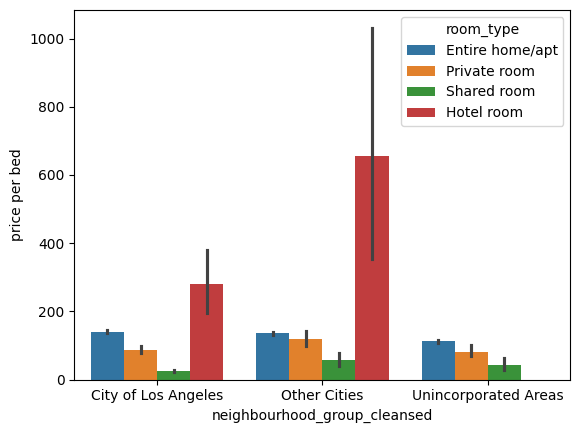

In [101]:
sns.barplot(data=df, x='neighbourhood_group_cleansed', y='price per bed', hue='room_type')

<Axes: xlabel='review_scores_rating', ylabel='price per bed'>

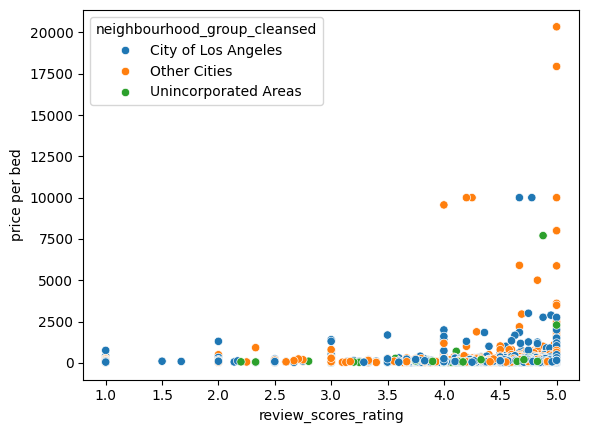

In [26]:
sns.scatterplot(data=df, x='review_scores_rating', y='price per bed', hue='neighbourhood_group_cleansed')

<Axes: xlabel='number_of_reviews', ylabel='price per bed'>

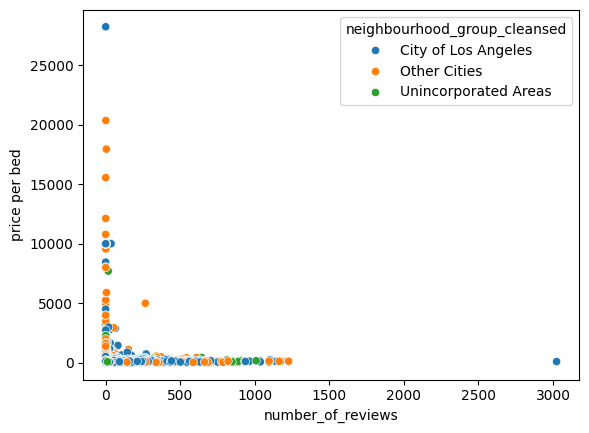

In [102]:
sns.scatterplot(data=df, x='number_of_reviews', y='price per bed', hue='neighbourhood_group_cleansed')

In [103]:
#top 10 neighborhood by Listing Density
# will use value_counts() fn - it will count how many times each unique value appears in the series

In [104]:
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

In [105]:
#head- will give top 10, valu count fun automatically sort in descending order

In [106]:
top_10_neighborhoods = neighborhood_counts.head(10)
print(top_10_neighborhoods)

neighbourhood_cleansed
Long Beach         1853
Hollywood          1725
Venice             1646
Beverly Hills      1500
Santa Monica       1480
Downtown           1243
West Hollywood     1159
Glendale            892
Hollywood Hills     729
Pasadena            722
Name: count, dtype: int64


In [107]:
 df.groupby(by='neighbourhood_cleansed')['price per bed'].mean()

neighbourhood_cleansed
Acton               94.571759
Adams-Normandie     56.534483
Agoura Hills        91.197421
Agua Dulce         114.616556
Alhambra            65.279144
                      ...    
Willowbrook         60.505242
Wilmington          53.312500
Windsor Square     120.500000
Winnetka            82.347669
Woodland Hills     121.895067
Name: price per bed, Length: 266, dtype: float64

In [108]:
#visualization


In [109]:

# Calculate the listing count (you've already done this)
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

#calculated average price per bed by neighborhood
avg_price_per_bed = df.groupby(by='neighbourhood_cleansed')['price per bed'].mean()

# Get the top 10 neighborhoods by listing count
top_10_neighborhoods = neighborhood_counts.head(10)

# Get the average price per bed for the top 10 neighborhoods
top_10_avg_prices = avg_price_per_bed[top_10_neighborhoods.index]


Text(0, 0.5, 'Number of Listings')

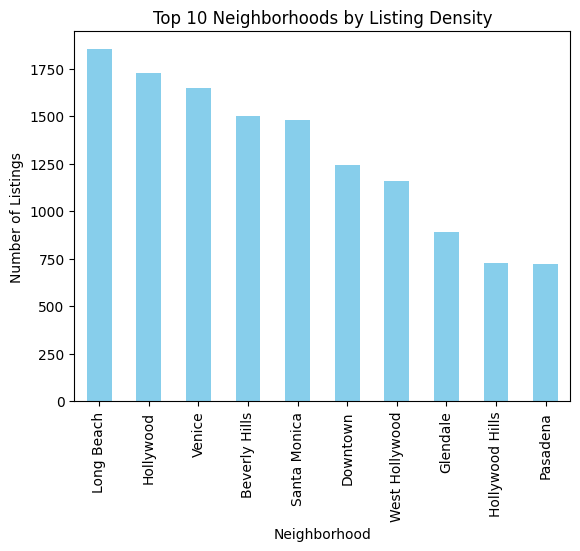

In [145]:
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods by Listing Density')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')

In [146]:
# Calculate the average price per neighborhood
avg_price_per_neighborhood = df.groupby('neighbourhood_cleansed')['price per bed'].mean()

# Get the top 10 neighborhoods by average price
top_10_avg_price = avg_price_per_neighborhood.nlargest(10)


Text(0, 0.5, 'Average Price ($)')

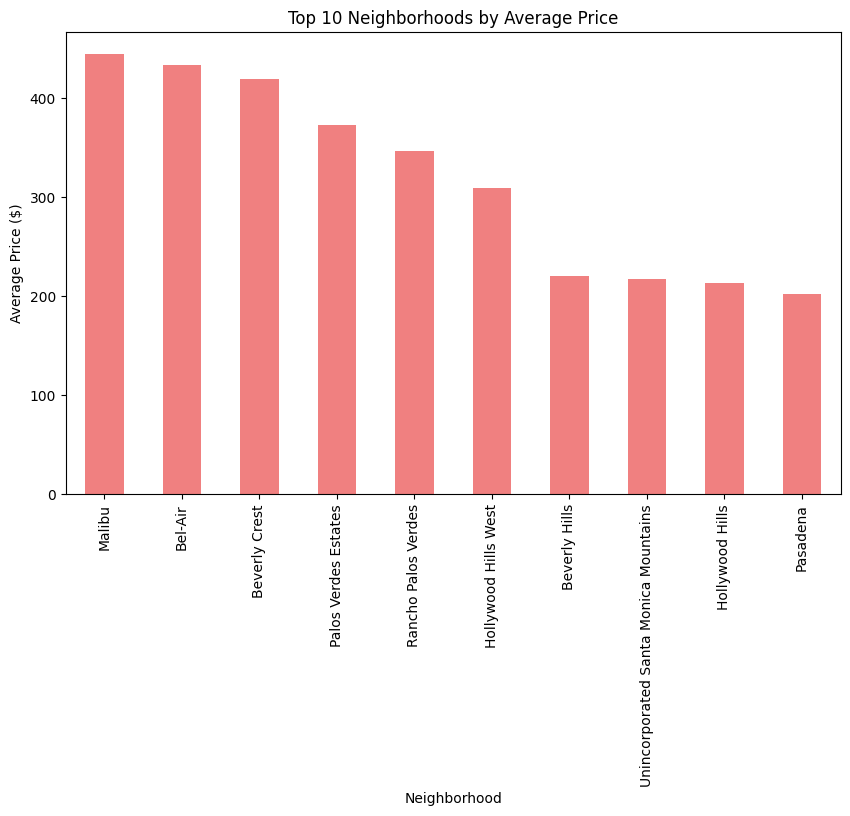

In [147]:

# Plotting
plt.figure(figsize=(10, 6))
top_10_avg_price.plot(kind='bar', color='lightcoral')
# Add title and labels
plt.title('Top 10 Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price ($)')

In [148]:
avg_price_per_neighbourhood = df.groupby('neighbourhood_cleansed')['price per bed'].mean()

In [149]:
top10_ppb_neighbourhood= avg_price_per_neighbourhood.nlargest(10)

In [150]:
print(top10_ppb_neighbourhood)

neighbourhood_cleansed
Malibu                                   444.105024
Bel-Air                                  433.272022
Beverly Crest                            419.107992
Palos Verdes Estates                     372.513715
Rancho Palos Verdes                      345.846099
Hollywood Hills West                     309.296851
Beverly Hills                            220.214192
Unincorporated Santa Monica Mountains    217.017240
Hollywood Hills                          212.780042
Pasadena                                 202.139722
Name: price per bed, dtype: float64


/var/folders/2f/ly0mx7ws4fz9h6krdgk5fywh0000gn/T/ipykernel_3485/2629438843.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_cleansed', y='price per bed', data=top_10_neighborhood_data_filtered, palette='Set2', showfliers = False)


Text(108.34722222222221, 0.5, 'Price per Bed ($)')

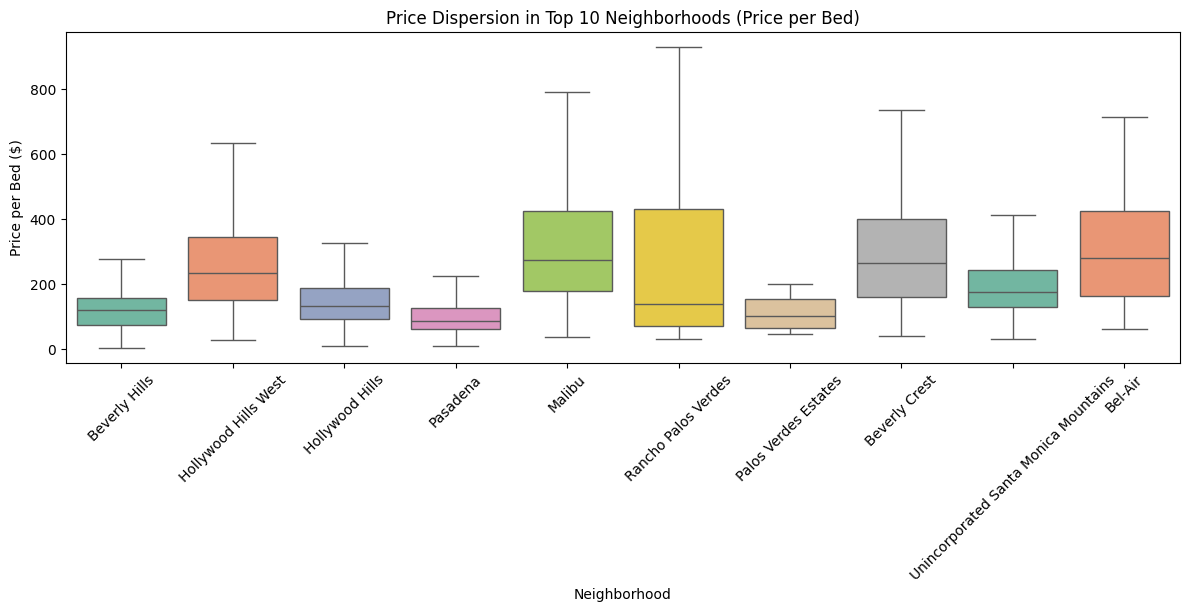

In [166]:
# Get the top 10 neighborhoods based on average price per bed
top_10_neighborhoods = top10_ppb_neighbourhood.index

# Filter the original dataset to include only these top 10 neighborhoods
top_10_neighborhood_data = df[df['neighbourhood_cleansed'].isin(top_10_neighborhoods)]
# Optional: Remove extreme outliers (if needed)
price_threshold = 1000  # Set an appropriate threshold to exclude extreme values
top_10_neighborhood_data_filtered = top_10_neighborhood_data[top_10_neighborhood_data['price per bed'] < price_threshold]

# Create a boxplot for price per bed in the top 10 neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price per bed', data=top_10_neighborhood_data_filtered, palette='Set2', showfliers = False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Suppress the printout in the console
plt.tight_layout()


# Add title and labels
plt.title('Price Dispersion in Top 10 Neighborhoods (Price per Bed)')
plt.xlabel('Neighborhood')
plt.ylabel('Price per Bed ($)')



In [169]:
#The boxplot reveals significant variation in listing prices among the top 10 neighborhoods. 
#YELLOW exhibits the widest range, with prices extending far above other neighborhoods, 
#indicating a mix of budget and high-end properties. orange green also show relatively high median prices, reflecting their premium locations. 
#In contrast, neighborhoods like pink, brown greenhave narrower price ranges, suggesting a more consistent pricing structure. 
#This analysis highlights how price dynamics vary across Los Angeles, influenced by location and property characteristics.